In [ ]:
# dataset: https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection



In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

np.random.seed(1)


Using TensorFlow backend.


In [2]:
train_images=[]
train_labels=[]
shape=(200, 200)
train_path='C:/Users/hansu/Code/Study/data/fruit-images-for-object-detection/train_zip/train'

# jpg 파일형식만 train_images에 넣기
for filename in os.listdir('C:/Users/hansu/Code/Study/data/fruit-images-for-object-detection/train_zip/train'):
    if filename.split('.')[1]=='jpg':
        img=cv2.imread(os.path.join(train_path, filename))
        
         # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
         # Resize all images to a specific shape
        img=cv2.resize(img, shape)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # matplotlib과 cv2는 rgb가 반대
        train_images.append(img)

# 원핫인코딩
train_labels=pd.get_dummies(train_labels).values

# Converting train_images to array
train_images=np.array(train_images)

# train, test set 나누기
x_train, x_val, y_train, y_val=train_test_split(train_images, train_labels, random_state=1)


In [5]:
print(train_images.shape)
print(train_labels.shape)

(240, 200, 200, 3)
(240, 4)


In [6]:
test_images=[]
test_labels=[]
shape=(200, 200)
test_path='C:/Users/hansu/Code/Study/data/fruit-images-for-object-detection/test_zip/test'

for filename in os.listdir('C:/Users/hansu/Code/Study/data/fruit-images-for-object-detection/test_zip/test'):
    if filename.split('.')[1]=='jpg':
        img=cv2.imread(os.path.join(test_path, filename))
        
         # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img=cv2.resize(img, shape)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_images.append(img)

# test_images, test_labels 를 배열로 바꾸기
test_images=np.array(test_images)
test_labels=np.array(test_labels) 

In [7]:
print("test images:")
print(type(test_images))
print(test_images.shape)

print("test labels: ")
print(type(test_labels))
print(test_labels.shape)

test images:
<class 'numpy.ndarray'>
(60, 200, 200, 3)
test labels: 
<class 'numpy.ndarray'>
(60,)


[1 0 0 0]


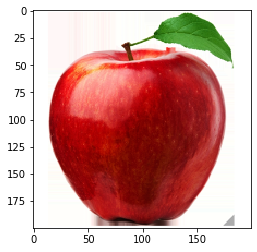

In [8]:
# train data 시각화
print(train_labels[0])
plt.imshow(train_images[0])

[0 1 0 0]


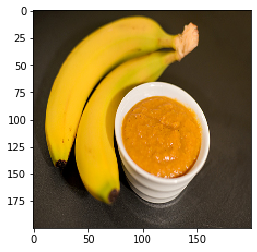

In [9]:
print(train_labels[80])
plt.imshow(train_images[80])

apple


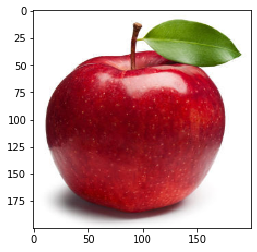

In [10]:
print(test_labels[12])
plt.imshow(test_images[12])

In [11]:
# Sequential model 만들기

model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_1 (Flatten)          (None, 63480)            

In [13]:
# model 훈련
history=model.fit(x_train, y_train, epochs=50, batch_size=50, 
                  validation_data=(x_val, y_val))

Train on 180 samples, validate on 60 samples
Epoch 1/50
180/180 [==============================] - 20s 113ms/step - loss: 3.1261 - accuracy: 0.3889 - val_loss: 1.2445 - val_accuracy: 0.4667
Epoch 2/50
180/180 [==============================] - 21s 117ms/step - loss: 1.1712 - accuracy: 0.5444 - val_loss: 0.7865 - val_accuracy: 0.6833
Epoch 3/50
180/180 [==============================] - 20s 111ms/step - loss: 0.9551 - accuracy: 0.6389 - val_loss: 0.9475 - val_accuracy: 0.7667
Epoch 4/50
180/180 [==============================] - 22s 125ms/step - loss: 0.7843 - accuracy: 0.7389 - val_loss: 1.0736 - val_accuracy: 0.7833
Epoch 5/50
180/180 [==============================] - 23s 126ms/step - loss: 0.6474 - accuracy: 0.8333 - val_loss: 1.6213 - val_accuracy: 0.7667
Epoch 6/50
180/180 [==============================] - 24s 131ms/step - loss: 0.7173 - accuracy: 0.8222 - val_loss: 0.9000 - val_accuracy: 0.8167
Epoch 7/50
180/180 [==============================] - 28s 158ms/step - loss: 0.5288 -

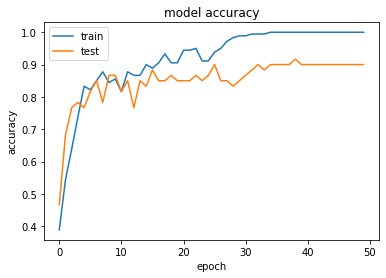

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

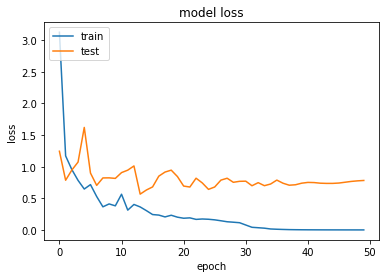

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# Evaluating model on validation data
val_loss, val_acc = model.evaluate(x_val,y_val)
print("val_loss: "+str(val_loss))
print("val_acc: "+str(val_acc))

60/60 [==============================] - 1s 20ms/step
val_loss: 0.782831343015035
val_acc: 0.8999999761581421


In [48]:
# Evaluating model on test data
print(type(test_images))
print(test_images.shape)
print(type(test_labels))
print(test_labels.shape)

# checkImage = test_images[0:1]
# checklabel = test_labels[0:1]

# predict = model.predict(np.array(checkImage))
# print(predict)

<class 'numpy.ndarray'>
(60, 200, 200, 3)
<class 'numpy.ndarray'>
(60,)
[[1.0000000e+00 3.0884618e-13 8.1748105e-14 1.5829553e-11]]


In [43]:
print(test_labels[0:1])

['apple']


In [55]:
predict=model.predict(test_images)
predict_result=[]
output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

for i in range(len(test_images)):
    predict_result.append(output[np.argmax(predict[i])])


In [56]:
#test 정확도
print(test_labels)
print("\n")
print(predict_result)

['apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'mixed' 'mixed' 'mixed' 'mixed' 'mixed'
 'orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange'
 'orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange'
 'orange' 'orange']


['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'orange', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'orange', 'banana', 'banana', 'orange', 'banana', 'orange', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'orange', 'banana', 'apple', 'banana', 'apple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', '

In [57]:
# test 정확도 수치화
print(np.mean(np.array(test_labels)==np.array(predict_result)))

0.8333333333333334


# 다른 예측 모델

In [58]:
# LeNet-5를 적용해봄

model2=Sequential()
model2.add(Conv2D(filters=6, kernel_size=(3,3), activation='tanh', input_shape=(200,200,3,)))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(filters=6,kernel_size = (3,3),activation='tanh'))
model2.add(MaxPool2D(2,2))

model2.add(Conv2D(filters=16,kernel_size = (3,3),activation='tanh'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(filters=16,kernel_size = (3,3),activation='tanh'))
model2.add(MaxPool2D(2,2))

model2.add(Flatten())

model2.add(Dense(20,activation='relu'))
model2.add(Dense(15,activation='relu'))
model2.add(Dense(4,activation = 'softmax'))
    
model2.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [59]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 6)       168       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 6)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 97, 6)         330       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 16)        880       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 16)       

In [60]:
# model 훈련
history=model2.fit(x_train, y_train, epochs=50, batch_size=50, 
                  validation_data=(x_val, y_val))

Train on 180 samples, validate on 60 samples
Epoch 1/50
180/180 [==============================] - 3s 19ms/step - loss: 1.3863 - accuracy: 0.2833 - val_loss: 1.2077 - val_accuracy: 0.6000
Epoch 2/50
180/180 [==============================] - 4s 24ms/step - loss: 1.1678 - accuracy: 0.5778 - val_loss: 1.0328 - val_accuracy: 0.6000
Epoch 3/50
180/180 [==============================] - 4s 22ms/step - loss: 1.0302 - accuracy: 0.6778 - val_loss: 0.8696 - val_accuracy: 0.6833
Epoch 4/50
180/180 [==============================] - 4s 23ms/step - loss: 0.8493 - accuracy: 0.7444 - val_loss: 0.7631 - val_accuracy: 0.7667
Epoch 5/50
180/180 [==============================] - 4s 22ms/step - loss: 0.6648 - accuracy: 0.8278 - val_loss: 0.5648 - val_accuracy: 0.8167
Epoch 6/50
180/180 [==============================] - 4s 23ms/step - loss: 0.5174 - accuracy: 0.8556 - val_loss: 0.5125 - val_accuracy: 0.8167
Epoch 7/50
180/180 [==============================] - 4s 25ms/step - loss: 0.4071 - accuracy: 0.8

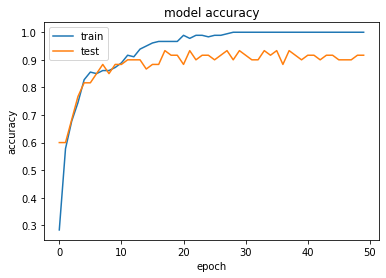

In [61]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

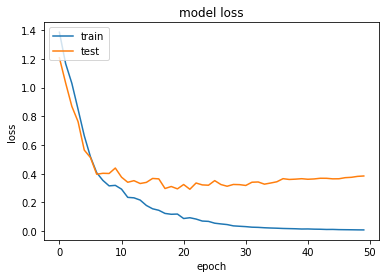

In [63]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
# Evaluating model on validation data
val_loss, val_acc = model2.evaluate(x_val,y_val)
print("val_loss: "+str(val_loss))
print("val_acc: "+str(val_acc))

60/60 [==============================] - 0s 5ms/step
val_loss: 0.3842276632785797
val_acc: 0.9166666865348816


In [65]:
# Testing predictions and the actual label
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model2.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['apple']
Predicted :-  apple


In [66]:
predict=model2.predict(test_images)
predict_result=[]
output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

for i in range(len(test_images)):
    predict_result.append(output[np.argmax(predict[i])])


In [67]:
#test 정확도
print(test_labels)
print("\n")
print(predict_result)

['apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'mixed' 'mixed' 'mixed' 'mixed' 'mixed'
 'orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange'
 'orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange' 'orange'
 'orange' 'orange']


['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'orange', 'banana', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'orange', 'banana', 'apple', 'mixed', 'apple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'oran

In [68]:
# test 정확도 수치화
print(np.mean(np.array(test_labels)==np.array(predict_result)))

0.9
